1.Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)

2.Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей

3.Построить случайный лес, вывести важность признаков

4.Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

5.Для валидации модели 2-го уровня использовать отдельный hold-out датасет, как на занятии

6.Показать, что использование ансамблей моделей действительно улучшает качество (стекинг vs другие модели сравнивать на hold-out)

7.В качестве решения: Jupyter notebook с кодом, комментариями и графиками


# 1. Решаем задачу регрессии - предскажем цены на недвижимость.

In [92]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Воспользуемся только численными данными, так как фичей в данных много. 
df=df.select_dtypes(include = ['float64', 'int64']).drop(['Id','YearBuilt','GarageYrBlt','MasVnrArea','YrSold','MoSold','YearRemodAdd'], axis=1)

In [4]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,7,5,706,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,6,8,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,7,5,486,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,7,5,216,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,8,5,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
Ope

In [6]:
# Присваиваем целевую переменную y_train
X=df.drop(['SalePrice'], axis=1)
y=df['SalePrice']

In [7]:
from sklearn.preprocessing import Imputer 

In [8]:
# сохраним наименования столбцов 
columns=X.columns

In [9]:
# Вставим значения по стратегии mean в столбец LotFrontage      
imp=Imputer()
X=pd.DataFrame(imp.fit_transform(X), columns=X.columns)
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
MSSubClass       1460 non-null float64
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
OverallQual      1460 non-null float64
OverallCond      1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtUnfSF        1460 non-null float64
TotalBsmtSF      1460 non-null float64
1stFlrSF         1460 non-null float64
2ndFlrSF         1460 non-null float64
LowQualFinSF     1460 non-null float64
GrLivArea        1460 non-null float64
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
FullBath         1460 non-null float64
HalfBath         1460 non-null float64
BedroomAbvGr     1460 non-null float64
KitchenAbvGr     1460 non-null float64
TotRmsAbvGrd     1460 non-null float64
Fireplaces       1460 non-null float64
GarageCars       1460 non-null float64
GarageArea       1460 non-null floa

C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,60.0,65.0,8450.0,7.0,5.0,706.0,0.0,150.0,856.0,856.0,...,0.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,978.0,0.0,284.0,1262.0,1262.0,...,1.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,486.0,0.0,434.0,920.0,920.0,...,1.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,216.0,0.0,540.0,756.0,961.0,...,1.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,655.0,0.0,490.0,1145.0,1145.0,...,1.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0


Сделаем допущение, не загружая тестовые данные. Обучим нашу модель и проверим на представленных трейновых данных.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
split=int(len(X)*0.8)
X_train= X[:split]
X_test=X[split:]
y_train= y[:split]
y_test= y[split:]
#X_train=, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train.info()

In [197]:
int(len(X)*0.8)

1168

In [195]:
LR=LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR=LR.predict(X_train)
y_pred_LR_test=LR.predict(X_test)
LR.score(X_train, y_train)

0.8342940806572339

In [196]:
LR.score(X_test, y_test)

0.6301825926067591

# 2. Восползуемся 10-fold кросс-валидацией для оценки качества моделей

In [33]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

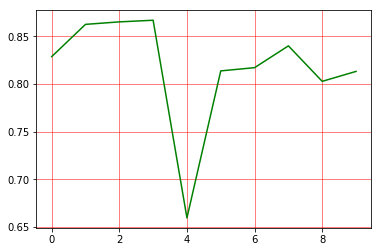

In [34]:
plt.plot(cross_val_score(LR, X_train, y_train, cv=10), 'g')
plt.grid(color='r', linestyle='-', linewidth=0.5)

Исходя из данной модели видно, что есть вероятность получения предсказания с маленькой точностью.

# 3.Построить случайный лес, вывести важность признаков

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
RFR=RandomForestRegressor(n_jobs=-1)
RFR.fit(X_train, y_train)

C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [120]:
y_pred_RFR=RFR.predict(X_train)
y_pred_RFR_test=RFR.predict(X_test)

In [38]:
print("На трейновых данных",RFR.score(X_train, y_train))
print("На тестовых данных",RFR.score(X_test, y_test))

На трейновых данных 0.9674194167604191
На тестовых данных 0.8462121671801142


Посморим на данные кросс валидации для модели RandomForestRegressor (RFR)

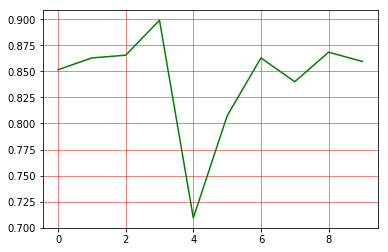

In [83]:
plt.plot(cross_val_score(RFR, X_train, y_train, cv=10, n_jobs=-1), 'g')
plt.grid(color='r', linestyle='-', linewidth=0.5)

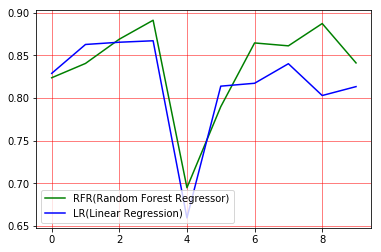

In [65]:
plt.plot(cross_val_score(RFR, X_train, y_train, cv=10, n_jobs=-1), 'g', label='RFR(Random Forest Regressor)')
plt.plot(cross_val_score(LR, X_train, y_train, cv=10, n_jobs=-1), 'b', label='LR(Linear Regression)')
plt.legend()
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

In [48]:
for feature_name, feature_importance in zip(X_train.columns, RFR.feature_importances_):
    print('Feature: "%s"\tFeature importance: %.4f' % (feature_name, feature_importance))

Feature: "MSSubClass"	Feature importance: 0.0028
Feature: "LotFrontage"	Feature importance: 0.0099
Feature: "LotArea"	Feature importance: 0.0250
Feature: "OverallQual"	Feature importance: 0.5727
Feature: "OverallCond"	Feature importance: 0.0081
Feature: "BsmtFinSF1"	Feature importance: 0.0333
Feature: "BsmtFinSF2"	Feature importance: 0.0012
Feature: "BsmtUnfSF"	Feature importance: 0.0087
Feature: "TotalBsmtSF"	Feature importance: 0.0503
Feature: "1stFlrSF"	Feature importance: 0.0273
Feature: "2ndFlrSF"	Feature importance: 0.0139
Feature: "LowQualFinSF"	Feature importance: 0.0002
Feature: "GrLivArea"	Feature importance: 0.1322
Feature: "BsmtFullBath"	Feature importance: 0.0031
Feature: "BsmtHalfBath"	Feature importance: 0.0003
Feature: "FullBath"	Feature importance: 0.0181
Feature: "HalfBath"	Feature importance: 0.0014
Feature: "BedroomAbvGr"	Feature importance: 0.0017
Feature: "KitchenAbvGr"	Feature importance: 0.0006
Feature: "TotRmsAbvGrd"	Feature importance: 0.0075
Feature: "Firepla

### Построим еще одну модель, используя логистическую регрессию

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [119]:
KNR = KNeighborsRegressor(n_jobs=-1 ).fit( X_train, y_train )
y_pred_KNR = KNR.predict( X_train )
y_pred_KNR_test=KNR.predict( X_test )

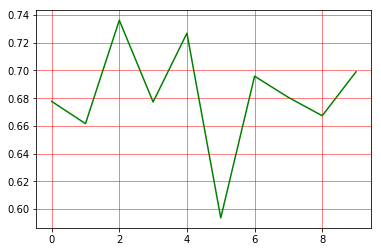

In [101]:
plt.plot(cross_val_score(KNR, X_train, y_train, cv=10), 'g')
plt.grid(color='r', linestyle='-', linewidth=0.5)

In [102]:
KNR.score(X_train, y_train)

0.7926944461052551

# 5.Для валидации модели 2-го уровня использовать отдельный hold-out датасет

In [249]:
LinR_2=LinearRegression(normalize=True)

In [250]:
# cоберем предсказания для стекинга
X_train_stack=np.stack([y_pred_KNR,y_pred_RFR,y_pred_LR], axis=1)

In [251]:
X_train_stack=pd.DataFrame(data=X_train_stack, columns=['y_pred_KNR','y_pred_RFR','y_pred_LR'])

In [252]:
X_train_stack.head()

,y_pred_KNR,y_pred_RFR,y_pred_LR
0,215015.6,199300.0,226144.946914
1,156600.0,176850.0,197686.421892
2,225380.0,224400.0,216781.367752
3,189340.0,177900.0,183542.756824
4,250600.0,259775.0,285959.063382


In [253]:
LinR_2.fit(X_train_stack, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [254]:
y_pred_common_train=LogR.predict(X_train_stack)

In [255]:
LinR_2.score(X_train_stack,y_train)

0.9722193754410402

In [256]:
X_test_stack=np.stack([y_pred_KNR_test,y_pred_RFR_test,y_pred_LR_test], axis=1)

In [257]:
X_train_stack=pd.DataFrame(data=X_train_stack, columns=['y_pred_KNR_test','y_pred_RFR_test','y_pred_LR_test'])

In [258]:
y_pred_test_stack=LogR.predict(X_test_stack)

In [259]:
LinR_2.score(X_test_stack, y_test)

0.8464226864605141

Воспользуемся общей метрикой для задач регрессии R2Score для оценки качества.

In [248]:
from sklearn.metrics import r2_score

In [266]:
print("Результат для стекинга               ",r2_score(y_test, y_pred_test_stack))
print("Результат для KNeighborsRegressor    ",r2_score(y_test, y_pred_KNR_test))
print("Результат для RandomForestRegressor  ",r2_score(y_test, y_pred_RFR_test))
print("Результат для LinearRegression       ",r2_score(y_test, y_pred_LR_test))

Результат для стекинга                0.8464226864605141
Результат для KNeighborsRegressor     0.5635048398667403
Результат для RandomForestRegressor   0.8462121671801142
Результат для LinearRegression        0.6301825926067591


Действительно, с помощью стекинга можно получить результат лучше. Но в данном случае результат был немного лучше, чем при одном RandomForestRegressor.